# **DATA ANALYSIS PROJECT : AIR QUALITY**
- Kelompok : IF6-10123215
- Anggota : </br>
10123215 - RATUAYU NURFAJAR</br>
10123214 - SALSABILA<br>
10123218 - RAFLY RAYHANSYAH<br>
10123240 - ARMY HANIF HABIBIE<br>
10123255 - RADITYA RESKYANANTA SAPUTRA <br>

Pada kasus ini, dataset air quality mengukur kualitas udara di lokasi/station di sekitar Beijing, China. Dataset ini memiliki beberapa  fitur/atribut, diantaranya:
1. no
2. year : tahun air quality data diambil
3. month : bulan air quality data diambil
4. day : tanggal air quality data diambil
5. hour : jam spesifik air quality data diambil
6. pm2.5 : PM2.5 dapat dimaknai sebagai partikel udara yang berukuran lebih kecil dari atau sama dengan 2.5 µm (mikrometer). Beberapa sumber alami yang masuk dalam kategori PM2.5 adalah debu, jelaga, kotoran, garam tertiup angin, spora tumbuhan, serbuk sari hingga asap dari kebakaran hutan. Selain sumber alami, PM2.5 juga dihasilkan manusia dari ladang, kebakaran, jalan tanah, dan tempat konstruksi.
7. pm10 : PM10 adalah partikel udara dengan diameter 10 µm (mikrometer) atau kurang, termasuk asap, debu, jelaga, garam, asam, dan logam.
8. so2 : sulfur dioksida adalah gas tak berwarna dengan bau yang tajam. Gas ini dihasilkan dari pembakaran bahan bakar fosil (batu bara dan minyak) dan peleburan bijih mineral yang mengandung sulfur.
9. no2 : nitrogen dioksida gas yang umumnya dilepaskan dari pembakaran bahan bakar di sektor transportasi dan industri.
10. co : Karbon monoksida adalah gas beracun yang tidak berwarna, tidak berbau, dan tidak berasa yang dihasilkan dari pembakaran bahan bakar karbon yang tidak sempurna seperti kayu, bensin, arang, gas alam, dan minyak tanah.
11. o3 : ozon adalah salah satu konstituen utama kabut asap fotokimia dan terbentuk melalui reaksi dengan gas-gas dengan adanya sinar matahari.
12. temp : suhu udara yang diukur pada waktu dan lokasi tertentu
13. pres : tekanan udara
14. dewp :  titik embun
15. rain : curah hujan
16. wd : arah angin
17. wspm : kecepatan angin
18. station : lokasi pemantauan kualitas udara

Untuk analisis ini, kami menggunakan standar pengukuran kualitas udara dari WHO. Dimana untuk batas maksimal harian untuk setiap komponen polutan adalah: <br>
1. pm2.5 : ≤15 µg/m³ (rata-rata 24 jam, tidak lebih dari 3-4 hari dalam setahun).
2. pm10 : ≤45 µg/m³ (rata-rata 24 jam)
3. so3 : ≤40 µg/m³ (rata-rata 24 jam)
4. no2 : ≤25 µg/m³ (rata-rata 24 jam)
5. co : ≤7 µg/m³ (rata-rata 24 jam)
6. o3 : ≤100 µg/m³ (rata-rata 8 jam)

Untuk mengkalkulasikan maksimal polutan selama sehari:
> `Batas Maksimum = Jumlah Ambang Batas Harian / Jumlah Komponen Polutan` <br>
> Batas Maksimum = 15 + 45 + 40 + 25 + 7 + 100 / 6 ≈ 38,67 μg/m³ <br>

Tetapi perlu di ingat bahwa perhitungan ini adalah `pehitungan secara kasar` karena untuk `o3` memiliki` waktu rerata yang berbeda` dengan komponen lain.

Kami menggunakan beberapa sumber sebagai acuan dalam menganalisis data ini: <br>
- https://www.who.int/news-room/fact-sheets/detail/ambient-(outdoor)-air-quality-and-health?gad_source=1&gclid=Cj0KCQiA0fu5BhDQARIsAMXUBOL4CEjZLbpZ3X41SdRfZYBaIns5pubw0nOidS_mM0xmBaTSi78P2MMaAuvxEALw_wcB
- https://www.sciencedirect.com/topics/earth-and-planetary-sciences/meteorological-factors
- https://www.c40knowledgehub.org/s/article/WHO-Air-Quality-Guidelines?language=en_US#:~:text=By%20reducing%20air%20pollution%20levels,3%20-%204%20days%20per%20year.

## **Business Questions**

1. Stasiun mana saja yang memiliki masalah polusi selama tiga tahun terakhir? (10123215 - RATUAYU NURFAJAR)
2. Bagaimana hubungan antara faktor meteorologi dengan konsentrasi polutan? (10123215 - RATUAYU NURFAJAR)
3. Apa faktor-faktor yang paling berkontribusi terhadap peningkatan polusi pada station changping? (10123255 - RADITYA RESKYANANTA SAPUTRA)
4. Bagaimana grafik rara-rata polutan PM10 berdasarkan bulan selama periode (2014-2016) pada station tiantan? (10123218 - RAFLY RAYHANSYAH)
5. Bagaimana perbedaan konsentrasi rata-rata O3 pada pagi hari (06:00–10:00) dan sore hari (15:00–19:00) di Stasiun Tiantan sepanjang tahun 2016? (10123218 - RAFLY RAYHANSYAH)
6. Apakah ada perbedaan kualitas udara pada rush hour (jam sibuk) dibanding dengan off-peak hour (jam tidak sibuk) di sekitar Beijing, China? (10123214 - SALSABILA)
7. Bagaimana rata-rata konsentrasi PM2.5 dan PM10 di ketiga stasiun(DIngling, Guanyuan, Huairou) sepanjang tahun 2015? (10123240 - ARMY HANIF HABIBIE)

## **Library**

### Download Library

In [1]:
!pip install pandas numpy matplotlib seaborn

### Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import drive # untuk di run di colab
import seaborn as sns

## **Data Wrangling**

### Gathering Data
Load and read dataset

In [3]:
# folder_path = 'Air-quality-dataset/PRSA_Data_20130301-20170228' # local

drive.mount('/content/drive/')
folder_path = '/content/drive/MyDrive/semester 3/pemograman sains data/PRSA_Data_20130301-20170228'

df_list = []

# Load and read data with Loop
for file_name in os.listdir(path=folder_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        data = pd.read_csv(file_path)
        df_list.append(data)

Mounted at /content/drive/


In [4]:
# convert and join dataset from list to dataframe
df = pd.concat(df_list, ignore_index=True)
df

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
0           1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0   
1           2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0   
2           3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0   
3           4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0   
4           5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0   
...       ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
420763  35060  2017      2   28    19   11.0  32.0   3.0  24.0  400.0  72.0   
420764  35061  2017      2   28    20   13.0  32.0   3.0  41.0  500.0  50.0   
420765  35062  2017      2   28    21   14.0  28.0   4.0  38.0  500.0  54.0   
420766  35063  2017      2   28    22   12.0  23.0   4.0  30.0  400.0  59.0   
420767  35064  2017      2   28    23   13.0  19.0   4.0  38.0  600.0  49.0   

        TEMP    PRES  DEWP  RAIN   wd  WSPM        station  
0       -0.7  1023.0 -18.8   0.0  NNW   4.4   Aotizhongxin  
1       -1.1  1023.2 -18.2   0.0    N   4.7   Aotizhongxin  
2       -1.1  1023.5 -18.2   0.0  NNW   5.6   Aotizhongxin  
3       -1.4  1024.5 -19.4   0.0   NW   3.1   Aotizhongxin  
4       -2.0  1025.2 -19.5   0.0    N   2.0   Aotizhongxin  
...      ...     ...   ...   ...  ...   ...            ...  
420763  12.5  1013.5 -16.2   0.0   NW   2.4  Wanshouxigong  
420764  11.6  1013.6 -15.1   0.0  WNW   0.9  Wanshouxigong  
420765  10.8  1014.2 -13.3   0.0   NW   1.1  Wanshouxigong  
420766  10.5  1014.4 -12.9   0.0  NNW   1.2  Wanshouxigong  
420767   8.6  1014.1 -15.9   0.0  NNE   1.3  Wanshouxigong  

[420768 rows x 18 columns]

In [5]:
print("Number of Rows      : ", df.shape[0])
print("Number of Columns : ", df.shape[1])

Number of Rows      :  420768
Number of Columns :  18


### Assessing Data
Check missing values, duplicate values, and data statistics

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


>Berdasarkan informasi data `terdapat missing value` di beberapa kolom.

#### Missing Values

In [7]:
df.isna().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

>`Terdapat missing value` pada data.

In [8]:
df.groupby('station', group_keys=False).apply(lambda col: col.isna().sum())

<ipython-input-8-8eb41098099f>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('station', group_keys=False).apply(lambda col: col.isna().sum())


No  year  month  day  hour  PM2.5  PM10   SO2   NO2    CO  \
station                                                                    
Aotizhongxin    0     0      0    0     0    925   718   935  1023  1776   
Changping       0     0      0    0     0    774   582   628   667  1521   
Dingling        0     0      0    0     0    779   656   730  1234  2012   
Dongsi          0     0      0    0     0    750   553   663  1601  3197   
Guanyuan        0     0      0    0     0    616   429   474   659  1753   
Gucheng         0     0      0    0     0    646   381   507   668  1401   
Huairou         0     0      0    0     0    953   777   980  1639  1422   
Nongzhanguan    0     0      0    0     0    628   440   446   692  1206   
Shunyi          0     0      0    0     0    913   548  1296  1365  2178   
Tiantan         0     0      0    0     0    677   597  1118   744  1126   
Wanliu          0     0      0    0     0    382   284   575  1070  1812   
Wanshouxigong   0     0      0    0     0    696   484   669   754  1297   

                 O3  TEMP  PRES  DEWP  RAIN   wd  WSPM  station  
station                                                          
Aotizhongxin   1719    20    20    20    20   81    14        0  
Changping       604    53    50    53    51  140    43        0  
Dingling       1214    53    50    53    51  140    43        0  
Dongsi          664    20    20    20    20   78    14        0  
Guanyuan       1173    20    20    20    20   81    14        0  
Gucheng         729    51    50    51    43  159    42        0  
Huairou        1151    51    53    53    55  302    49        0  
Nongzhanguan    506    20    20    20    20   78    14        0  
Shunyi         1489    51    51    54    51  483    44        0  
Tiantan         843    20    20    20    20   78    14        0  
Wanliu         2107    20    20    20    20  123    14        0  
Wanshouxigong  1078    19    19    19    19   79    13        0

>Setiap station memiliki `missing value` pada beberapa column dengan `jumlah yang cukup banyak`.

#### Duplicate Values

In [9]:
print(f'Number of duplicate: {df.duplicated().sum()}')

Number of duplicate: 0


`Tidak terdapat duplicate value` pada data.

#### Statistics Summary

In [10]:
df.describe()

No           year          month            day  \
count  420768.000000  420768.000000  420768.000000  420768.000000   
mean    17532.500000    2014.662560       6.522930      15.729637   
std     10122.116943       1.177198       3.448707       8.800102   
min         1.000000    2013.000000       1.000000       1.000000   
25%      8766.750000    2014.000000       4.000000       8.000000   
50%     17532.500000    2015.000000       7.000000      16.000000   
75%     26298.250000    2016.000000      10.000000      23.000000   
max     35064.000000    2017.000000      12.000000      31.000000   

                hour          PM2.5           PM10            SO2  \
count  420768.000000  412029.000000  414319.000000  411747.000000   
mean       11.500000      79.793428     104.602618      15.830835   
std         6.922195      80.822391      91.772426      21.650603   
min         0.000000       2.000000       2.000000       0.285600   
25%         5.750000      20.000000      36.000000       3.000000   
50%        11.500000      55.000000      82.000000       7.000000   
75%        17.250000     111.000000     145.000000      20.000000   
max        23.000000     999.000000     999.000000     500.000000   

                 NO2             CO             O3           TEMP  \
count  408652.000000  400067.000000  407491.000000  420370.000000   
mean       50.638586    1230.766454      57.372271      13.538976   
std        35.127912    1160.182716      56.661607      11.436139   
min         1.026500     100.000000       0.214200     -19.900000   
25%        23.000000     500.000000      11.000000       3.100000   
50%        43.000000     900.000000      45.000000      14.500000   
75%        71.000000    1500.000000      82.000000      23.300000   
max       290.000000   10000.000000    1071.000000      41.600000   

                PRES           DEWP           RAIN           WSPM  
count  420375.000000  420365.000000  420378.000000  420450.000000  
mean     1010.746982       2.490822       0.064476       1.729711  
std        10.474055      13.793847       0.821004       1.246386  
min       982.400000     -43.400000       0.000000       0.000000  
25%      1002.300000      -8.900000       0.000000       0.900000  
50%      1010.400000       3.100000       0.000000       1.400000  
75%      1019.000000      15.100000       0.000000       2.200000  
max      1042.800000      29.100000      72.500000      13.200000

> Berdasarkan statistics summaary di atas, `hampir semua fitur` mengandung `outlier` kecuali fitur year, month, day, dan hour

### Cleaning Data
Cleaning data from  data invalid and irrelevant

#### Drop irrelevant column

>Menghapus kolom `No` karena tidak memiliki makna untuk analisis.

In [11]:
df_clean = df.drop(columns='No', axis=1)
df_clean

year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0       2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1       2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2       2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3       2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4       2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   
...      ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   ...   
420763  2017      2   28    19   11.0  32.0   3.0  24.0  400.0  72.0  12.5   
420764  2017      2   28    20   13.0  32.0   3.0  41.0  500.0  50.0  11.6   
420765  2017      2   28    21   14.0  28.0   4.0  38.0  500.0  54.0  10.8   
420766  2017      2   28    22   12.0  23.0   4.0  30.0  400.0  59.0  10.5   
420767  2017      2   28    23   13.0  19.0   4.0  38.0  600.0  49.0   8.6   

          PRES  DEWP  RAIN   wd  WSPM        station  
0       1023.0 -18.8   0.0  NNW   4.4   Aotizhongxin  
1       1023.2 -18.2   0.0    N   4.7   Aotizhongxin  
2       1023.5 -18.2   0.0  NNW   5.6   Aotizhongxin  
3       1024.5 -19.4   0.0   NW   3.1   Aotizhongxin  
4       1025.2 -19.5   0.0    N   2.0   Aotizhongxin  
...        ...   ...   ...  ...   ...            ...  
420763  1013.5 -16.2   0.0   NW   2.4  Wanshouxigong  
420764  1013.6 -15.1   0.0  WNW   0.9  Wanshouxigong  
420765  1014.2 -13.3   0.0   NW   1.1  Wanshouxigong  
420766  1014.4 -12.9   0.0  NNW   1.2  Wanshouxigong  
420767  1014.1 -15.9   0.0  NNE   1.3  Wanshouxigong  

[420768 rows x 17 columns]

In [12]:
df_clean['station'].value_counts()

station
Aotizhongxin     35064
Changping        35064
Dingling         35064
Dongsi           35064
Guanyuan         35064
Gucheng          35064
Huairou          35064
Nongzhanguan     35064
Shunyi           35064
Tiantan          35064
Wanliu           35064
Wanshouxigong    35064
Name: count, dtype: int64

> Setiap station memiliki `distribusi data yang sama`.

#### Missing Values Handling

In [13]:
# result = df_clean.groupby('station').apply(lambda x: x)
# display(result)

<h5> Numeric Handling

> Mengisi nilai yang hilang (`missing value`) dengan `rata-rata pada kolom tertentu` untuk `setiap station`. Teknik ini bertujuan agar nilai yang diisi `lebih valid` sesuai dengan kondisi masing-masing `station`, sehingga menghindari terjadinya `outlier` pada data stasiun tersebut akibat pengisian nilai secara `global`.

In [14]:
columns_numeric = df_clean.drop(columns=['wd','station']).columns

for col in columns_numeric:
    if df_clean[col].isna().sum() > 0:
        df_clean[col] = df_clean.groupby('station')[col].transform(lambda x: x.fillna(x.mean()))

df_clean

year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0       2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1       2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2       2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3       2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4       2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   
...      ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   ...   
420763  2017      2   28    19   11.0  32.0   3.0  24.0  400.0  72.0  12.5   
420764  2017      2   28    20   13.0  32.0   3.0  41.0  500.0  50.0  11.6   
420765  2017      2   28    21   14.0  28.0   4.0  38.0  500.0  54.0  10.8   
420766  2017      2   28    22   12.0  23.0   4.0  30.0  400.0  59.0  10.5   
420767  2017      2   28    23   13.0  19.0   4.0  38.0  600.0  49.0   8.6   

          PRES  DEWP  RAIN   wd  WSPM        station  
0       1023.0 -18.8   0.0  NNW   4.4   Aotizhongxin  
1       1023.2 -18.2   0.0    N   4.7   Aotizhongxin  
2       1023.5 -18.2   0.0  NNW   5.6   Aotizhongxin  
3       1024.5 -19.4   0.0   NW   3.1   Aotizhongxin  
4       1025.2 -19.5   0.0    N   2.0   Aotizhongxin  
...        ...   ...   ...  ...   ...            ...  
420763  1013.5 -16.2   0.0   NW   2.4  Wanshouxigong  
420764  1013.6 -15.1   0.0  WNW   0.9  Wanshouxigong  
420765  1014.2 -13.3   0.0   NW   1.1  Wanshouxigong  
420766  1014.4 -12.9   0.0  NNW   1.2  Wanshouxigong  
420767  1014.1 -15.9   0.0  NNE   1.3  Wanshouxigong  

[420768 rows x 17 columns]

<h5>  Object/String Handling

In [15]:
df_clean.head(10)

year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP    PRES  \
0  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7  1023.0   
1  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1  1023.2   
2  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1  1023.5   
3  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4  1024.5   
4  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0  1025.2   
5  2013      3    1     5    5.0   5.0  18.0  18.0  400.0  66.0  -2.2  1025.6   
6  2013      3    1     6    3.0   3.0  18.0  32.0  500.0  50.0  -2.6  1026.5   
7  2013      3    1     7    3.0   6.0  19.0  41.0  500.0  43.0  -1.6  1027.4   
8  2013      3    1     8    3.0   6.0  16.0  43.0  500.0  45.0   0.1  1028.3   
9  2013      3    1     9    3.0   8.0  12.0  28.0  400.0  59.0   1.2  1028.5   

   DEWP  RAIN   wd  WSPM       station  
0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1 -18.2   0.0    N   4.7  Aotizhongxin  
2 -18.2   0.0  NNW   5.6  Aotizhongxin  
3 -19.4   0.0   NW   3.1  Aotizhongxin  
4 -19.5   0.0    N   2.0  Aotizhongxin  
5 -19.6   0.0    N   3.7  Aotizhongxin  
6 -19.1   0.0  NNE   2.5  Aotizhongxin  
7 -19.1   0.0  NNW   3.8  Aotizhongxin  
8 -19.2   0.0  NNW   4.1  Aotizhongxin  
9 -19.3   0.0    N   2.6  Aotizhongxin

In [16]:
df_clean.tail(10)

year  month  day  hour  PM2.5  PM10        SO2       NO2           CO  \
420758  2017      2   28    14    3.0   6.0  17.148603   5.00000  1370.395031   
420759  2017      2   28    15   11.0  21.0   2.000000   5.00000   200.000000   
420760  2017      2   28    16    6.0  20.0   3.000000  55.52956   200.000000   
420761  2017      2   28    17   11.0  23.0   3.000000  12.00000   300.000000   
420762  2017      2   28    18   11.0  30.0   2.000000  16.00000   300.000000   
420763  2017      2   28    19   11.0  32.0   3.000000  24.00000   400.000000   
420764  2017      2   28    20   13.0  32.0   3.000000  41.00000   500.000000   
420765  2017      2   28    21   14.0  28.0   4.000000  38.00000   500.000000   
420766  2017      2   28    22   12.0  23.0   4.000000  30.00000   400.000000   
420767  2017      2   28    23   13.0  19.0   4.000000  38.00000   600.000000   

               O3  TEMP    PRES  DEWP  RAIN   wd  WSPM        station  
420758  82.000000  14.6  1013.3 -15.6   0.0    N   3.6  Wanshouxigong  
420759  56.229904  15.4  1013.0 -15.0   0.0  NNW   3.3  Wanshouxigong  
420760  80.000000  14.9  1012.6 -15.4   0.0   NW   2.1  Wanshouxigong  
420761  87.000000  14.2  1012.5 -14.9   0.0   NW   3.1  Wanshouxigong  
420762  82.000000  13.4  1013.0 -15.5   0.0  WNW   1.4  Wanshouxigong  
420763  72.000000  12.5  1013.5 -16.2   0.0   NW   2.4  Wanshouxigong  
420764  50.000000  11.6  1013.6 -15.1   0.0  WNW   0.9  Wanshouxigong  
420765  54.000000  10.8  1014.2 -13.3   0.0   NW   1.1  Wanshouxigong  
420766  59.000000  10.5  1014.4 -12.9   0.0  NNW   1.2  Wanshouxigong  
420767  49.000000   8.6  1014.1 -15.9   0.0  NNE   1.3  Wanshouxigong

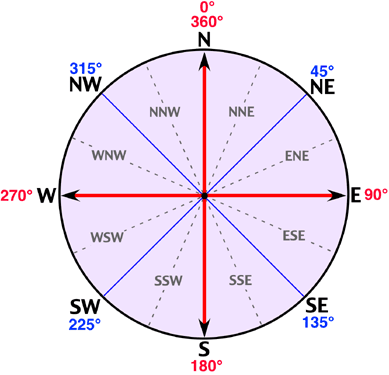

Jika dilihat pada kolom `wd` terdapat suatu pola dengan contoh:
1. NNW
2. NW
3. N
4. N
5. NNE
<hr>

1. N
2. NNW
3. NW
4. NW
5. WNW

>Terdapat nilai arah angin yang `berulang` sehinga dapat di anggap `cukup stabil` dan transisi perubahan arah angin yang `relatif teratur` (tidak berubah drastis dalam waktu dekat), sehingga untuk pengisian missing value akan menggunakan `teknik fillna`. Pertimbangan untuk tidak menggunakan `teknik modus atau median` agar data yang di isi `lebih variatif`.

In [17]:
df_clean['wd'] = df_clean['wd'].ffill()
df_clean

year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0       2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1       2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2       2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3       2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4       2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   
...      ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   ...   
420763  2017      2   28    19   11.0  32.0   3.0  24.0  400.0  72.0  12.5   
420764  2017      2   28    20   13.0  32.0   3.0  41.0  500.0  50.0  11.6   
420765  2017      2   28    21   14.0  28.0   4.0  38.0  500.0  54.0  10.8   
420766  2017      2   28    22   12.0  23.0   4.0  30.0  400.0  59.0  10.5   
420767  2017      2   28    23   13.0  19.0   4.0  38.0  600.0  49.0   8.6   

          PRES  DEWP  RAIN   wd  WSPM        station  
0       1023.0 -18.8   0.0  NNW   4.4   Aotizhongxin  
1       1023.2 -18.2   0.0    N   4.7   Aotizhongxin  
2       1023.5 -18.2   0.0  NNW   5.6   Aotizhongxin  
3       1024.5 -19.4   0.0   NW   3.1   Aotizhongxin  
4       1025.2 -19.5   0.0    N   2.0   Aotizhongxin  
...        ...   ...   ...  ...   ...            ...  
420763  1013.5 -16.2   0.0   NW   2.4  Wanshouxigong  
420764  1013.6 -15.1   0.0  WNW   0.9  Wanshouxigong  
420765  1014.2 -13.3   0.0   NW   1.1  Wanshouxigong  
420766  1014.4 -12.9   0.0  NNW   1.2  Wanshouxigong  
420767  1014.1 -15.9   0.0  NNE   1.3  Wanshouxigong  

[420768 rows x 17 columns]

In [18]:
df_clean.isna().sum()

year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

#### Duplicate Values Handling

## **Exploratory Data Analysis (EDA)**

### Bagaimana distribusi data pada masing masing fitur?

In [19]:
highly_skewed = []
moderately_skewed = []
normal_skewed = []

for i in columns_numeric:
    value_skew = df_clean[i].skew() # hitung skewness
    if value_skew < -1 or value_skew > 1 : # jika skewnessnya lebih besar dari 1 atau lebih kecil -1
        highly_skewed.append(i)
    elif (value_skew >= -1 and value_skew <= -0.5) or (value_skew <= 1 and value_skew >= 0.5) :  # jika skewnessnya di antara -1 dan -0.5 atau di antara 1 dan 0.5
        moderately_skewed.append(i)
    else : # jika skewnessnya tidak memenuhi dua kondisi di atas
        normal_skewed.append(i)

In [20]:
for i in highly_skewed :
    print(i, end=", ")

PM2.5, PM10, SO2, NO2, CO, O3, RAIN, WSPM, 

In [21]:
for i in moderately_skewed :
    print(i, end=", ")

In [22]:
for i in normal_skewed :
    print(i, end=", ")

year, month, day, hour, TEMP, PRES, DEWP, 

> Fitur `PM2.5, PM10, SO2, NO2, CO, O3, RAIN, WSPM` memiliki `distribusi skewness` yang sangat condong ke arah tertentu dan fitur `year, month, day, hour, TEMP, PRES, DEWP` memiliki `distribusi normal`.

### Apakah terdapat outlier di setiap fitur?

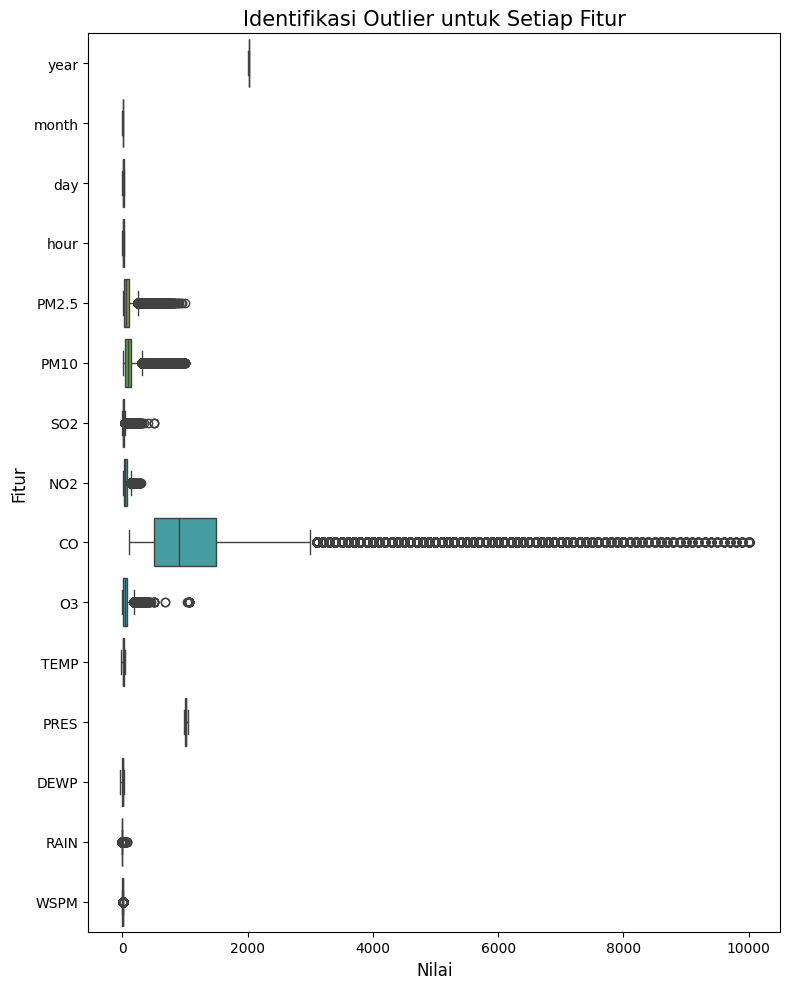

In [23]:
fig, axes = plt.subplots(figsize=(8, 10))
sns.boxplot(data=df_clean.drop(columns=['wd', 'station']), orient='h', ax=axes)

axes.set_title('Identifikasi Outlier untuk Setiap Fitur', fontsize=15, loc='center')
axes.set_ylabel('Fitur', fontsize=12)
axes.set_xlabel('Nilai', fontsize=12)

plt.tight_layout()
plt.show()

> Terdapat `fitur-fitur` yang memiliki `outlier`, kecuali fitur yang `berdistribusi normal`.

### Apakah distribusi data per bulan setiap tahunnya sama?

In [24]:
df_clean.groupby('year')['month'].unique()

year
2013          [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2014    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2015    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2016    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2017                                     [1, 2]
Name: month, dtype: object

> Data tahun 2013 dan 2017 `tidak mencakup` 12 bulan penuh, sehingga analisis akan difokuskan pada data tahun 2014-2016 untuk menghindari ketidakseimbangan.

In [25]:
df_filtered = df_clean[~df_clean['year'].isin([2013, 2017])]
df_filtered = df_filtered.reset_index(drop=True)
df_filtered

year  month  day  hour  PM2.5   PM10   SO2    NO2           CO  \
0       2014      1    1     0   20.0   90.0  18.0   62.0  1262.945145   
1       2014      1    1     1   43.0  348.0  25.0   91.0  1100.000000   
2       2014      1    1     2   79.0  423.0  41.0  103.0  1800.000000   
3       2014      1    1     3   82.0  337.0  43.0  101.0  2100.000000   
4       2014      1    1     4  124.0  594.0  59.0  130.0  2400.000000   
...      ...    ...  ...   ...    ...    ...   ...    ...          ...   
315643  2016     12   31    19  449.0  487.0  10.0  153.0  4500.000000   
315644  2016     12   31    20  460.0  492.0  12.0  146.0  4100.000000   
315645  2016     12   31    21  463.0  498.0  12.0  141.0  4400.000000   
315646  2016     12   31    22  493.0  537.0  12.0  124.0  5000.000000   
315647  2016     12   31    23  464.0  490.0   8.0  111.0  5400.000000   

               O3  TEMP    PRES  DEWP  RAIN   wd  WSPM        station  
0       56.353358  -1.5  1007.3 -12.5   0.0  SSE   0.6   Aotizhongxin  
1        1.000000  -2.6  1006.9 -12.1   0.0  WSW   0.2   Aotizhongxin  
2        1.000000  -3.0  1006.9 -11.3   0.0  WSW   0.6   Aotizhongxin  
3        1.000000  -3.3  1006.4 -11.1   0.0   SW   0.6   Aotizhongxin  
4        1.000000  -2.7  1006.1 -10.5   0.0  ENE   1.8   Aotizhongxin  
...           ...   ...     ...   ...   ...  ...   ...            ...  
315643   4.000000  -1.9  1022.0  -6.1   0.0  ESE   0.9  Wanshouxigong  
315644   4.000000  -2.5  1022.4  -5.5   0.0  ENE   0.7  Wanshouxigong  
315645   5.000000  -3.0  1022.1  -5.3   0.0    E   0.9  Wanshouxigong  
315646   8.000000  -3.0  1022.7  -5.0   0.0   SW   0.1  Wanshouxigong  
315647   7.000000  -4.0  1022.6  -5.7   0.0  ENE   0.9  Wanshouxigong  

[315648 rows x 17 columns]

### 1. Stasiun mana saja yang memiliki masalah polusi selama tiga tahun terakhir?

In [26]:
# komponen polutan
polutan = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# menghitung rata rata polutan per hari untuk setiap tahun dan setiap stasiun
df_daily = df_filtered.groupby(["station", "year", "month", "day"])[polutan].mean().reset_index()

df_daily

station  year  month  day       PM2.5        PM10        SO2  \
0       Aotizhongxin  2014      1    1   48.583333  169.166667  27.416667   
1       Aotizhongxin  2014      1    2  151.708333  192.166667  90.583333   
2       Aotizhongxin  2014      1    3   50.500000  114.708333  33.875000   
3       Aotizhongxin  2014      1    4  121.500000  158.208333  55.166667   
4       Aotizhongxin  2014      1    5   90.125000  116.750000  42.416667   
...              ...   ...    ...  ...         ...         ...        ...   
13147  Wanshouxigong  2016     12   27   40.958333   54.583333   7.375000   
13148  Wanshouxigong  2016     12   28   82.168678   90.726955  10.024767   
13149  Wanshouxigong  2016     12   29   71.750000   98.958333  13.958333   
13150  Wanshouxigong  2016     12   30  295.791667  325.916667  17.250000   
13151  Wanshouxigong  2016     12   31  394.166667  421.416667  16.916667   

              NO2           CO         O3  
0       69.500000  1419.289381  20.848057  
1       93.708333  3437.500000   1.250000  
2       48.125000  1083.333333  24.958333  
3       78.625000  2304.166667   1.083333  
4       70.708333  1850.000000  11.250000  
...           ...          ...        ...  
13147   48.500000   570.833333  26.541667  
13148   51.901992  1025.932091  26.538317  
13149   62.875000   850.000000  22.791667  
13150  119.208333  3520.833333   7.375000  
13151  148.208333  4879.166667   6.000000  

[13152 rows x 10 columns]

In [27]:
# menghitung total rata-rata polutan per hari
df_daily["polutan_average"] = df_daily[polutan].mean(axis=1)

df_daily

station  year  month  day       PM2.5        PM10        SO2  \
0       Aotizhongxin  2014      1    1   48.583333  169.166667  27.416667   
1       Aotizhongxin  2014      1    2  151.708333  192.166667  90.583333   
2       Aotizhongxin  2014      1    3   50.500000  114.708333  33.875000   
3       Aotizhongxin  2014      1    4  121.500000  158.208333  55.166667   
4       Aotizhongxin  2014      1    5   90.125000  116.750000  42.416667   
...              ...   ...    ...  ...         ...         ...        ...   
13147  Wanshouxigong  2016     12   27   40.958333   54.583333   7.375000   
13148  Wanshouxigong  2016     12   28   82.168678   90.726955  10.024767   
13149  Wanshouxigong  2016     12   29   71.750000   98.958333  13.958333   
13150  Wanshouxigong  2016     12   30  295.791667  325.916667  17.250000   
13151  Wanshouxigong  2016     12   31  394.166667  421.416667  16.916667   

              NO2           CO         O3  polutan_average  
0       69.500000  1419.289381  20.848057       292.467351  
1       93.708333  3437.500000   1.250000       661.152778  
2       48.125000  1083.333333  24.958333       225.916667  
3       78.625000  2304.166667   1.083333       453.125000  
4       70.708333  1850.000000  11.250000       363.541667  
...           ...          ...        ...              ...  
13147   48.500000   570.833333  26.541667       124.798611  
13148   51.901992  1025.932091  26.538317       214.548800  
13149   62.875000   850.000000  22.791667       186.722222  
13150  119.208333  3520.833333   7.375000       714.395833  
13151  148.208333  4879.166667   6.000000       977.645833  

[13152 rows x 11 columns]

In [28]:
# batas maksimum sudah di tentukan di awal analisis
threshold = 38.67

# menentukan stasiun yang menghadapi masalah polusi dimana rata-rata polutan > batas maksimum
df_polluted_stations = df_daily[df_daily["polutan_average"] > threshold]

In [29]:
# menampilkan stasiun yang memiliki masalah polusi beserta jumlah harinya
df_polluted_summary = df_polluted_stations.groupby("station")["day"].count().reset_index()
df_polluted_summary.columns = ["station", "jumlah_hari_terpolusi"]

df_polluted_summary

station  jumlah_hari_terpolusi
0    Aotizhongxin                   1096
1       Changping                   1095
2        Dingling                   1089
3          Dongsi                   1096
4        Guanyuan                   1096
5         Gucheng                   1096
6         Huairou                   1096
7    Nongzhanguan                   1096
8          Shunyi                   1095
9         Tiantan                   1096
10         Wanliu                   1094
11  Wanshouxigong                   1096

### 2. Bagaimana hubungan antara faktor meteorologi dengan konsentrasi polutan?

Jika polutan adalah faktor utama untuk mengukur kualitas udara, maka faktor meteorologi merujuk pada komponen-komponen yang mempengaruhi suatu atmosfer dan iklim. Pertanyaan ini bertujuan untuk mengetahi bagaimana hubungan antara kedua faktor tersebut sehingga faktor meteorologi dapat memberikan dampak langsung terhadap konsentrasi polutan atau tidak, meskipun analisis yang saya lakukan masih perlu analisis lebih dalam lagi setidaknya analisis korelasi ini dapat memberi gambaran secara garis besarnya. <br>

In [30]:
corr_factors = df_filtered.drop(columns=['year', 'month', 'day', 'hour', 'wd', 'station']).corr(method='spearman') # menggunakan metode spearman untuk data berdistribusi tidak normal
corr_factors

PM2.5      PM10       SO2       NO2        CO        O3      TEMP  \
PM2.5  1.000000  0.892449  0.496134  0.644258  0.829096 -0.248873 -0.044802   
PM10   0.892449  1.000000  0.498149  0.632010  0.726162 -0.213552 -0.038112   
SO2    0.496134  0.498149  1.000000  0.519856  0.571410 -0.236561 -0.392346   
NO2    0.644258  0.632010  0.519856  1.000000  0.736465 -0.624091 -0.290499   
CO     0.829096  0.726162  0.571410  0.736465  1.000000 -0.457029 -0.253645   
O3    -0.248873 -0.213552 -0.236561 -0.624091 -0.457029  1.000000  0.620694   
TEMP  -0.044802 -0.038112 -0.392346 -0.290499 -0.253645  0.620694  1.000000   
PRES  -0.044361 -0.055085  0.340186  0.211594  0.153468 -0.470839 -0.821677   
DEWP   0.210072  0.123716 -0.386642 -0.045673  0.057372  0.291891  0.812504   
RAIN  -0.034297 -0.088876 -0.157657 -0.079319 -0.001524 -0.001659  0.022169   
WSPM  -0.326478 -0.255240 -0.064429 -0.451932 -0.393804  0.438932  0.131292   

           PRES      DEWP      RAIN      WSPM  
PM2.5 -0.044361  0.210072 -0.034297 -0.326478  
PM10  -0.055085  0.123716 -0.088876 -0.255240  
SO2    0.340186 -0.386642 -0.157657 -0.064429  
NO2    0.211594 -0.045673 -0.079319 -0.451932  
CO     0.153468  0.057372 -0.001524 -0.393804  
O3    -0.470839  0.291891 -0.001659  0.438932  
TEMP  -0.821677  0.812504  0.022169  0.131292  
PRES   1.000000 -0.754651 -0.066351  0.014061  
DEWP  -0.754651  1.000000  0.165689 -0.213985  
RAIN  -0.066351  0.165689  1.000000 -0.014340  
WSPM   0.014061 -0.213985 -0.014340  1.000000

### 3. Apa faktor-faktor yang paling berkontribusi terhadap peningkatan polusi pada station changping?

In [31]:
changping_data = df_filtered[df_filtered['station'] == 'Changping'].copy()
correlation = changping_data[polutan].corr()
correlation

PM2.5      PM10       SO2       NO2        CO        O3
PM2.5  1.000000  0.853720  0.457332  0.667933  0.756790 -0.101236
PM10   0.853720  1.000000  0.413230  0.625665  0.662286 -0.067924
SO2    0.457332  0.413230  1.000000  0.485917  0.537699 -0.220889
NO2    0.667933  0.625665  0.485917  1.000000  0.729720 -0.484496
CO     0.756790  0.662286  0.537699  0.729720  1.000000 -0.321115
O3    -0.101236 -0.067924 -0.220889 -0.484496 -0.321115  1.000000

### 4. Bagaimana distribusi rara-rata polutan PM10 berdasarkan bulan selama periode (2014-2016) pada station tiantan?

In [32]:
# Filter data untuk station Tiantan dan tahun 2014-2016
tiantan_data = df_filtered[(df_filtered['station'] == 'Tiantan')].copy()
display(tiantan_data)

# Hitung rata-rata PM10 per bulan untuk setiap tahun
pm10_per_bulan = tiantan_data.groupby(['year', 'month'])['PM10'].mean().unstack()

# Mengganti angka bulan dengan nama bulan
nama_bulan = {
    1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April',
    5: 'Mei', 6: 'Juni', 7: 'Juli', 8: 'Agustus',
    9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'
}
pm10_per_bulan.columns = [nama_bulan[col] for col in pm10_per_bulan.columns]

print()
display(pm10_per_bulan)

year  month  day  hour  PM2.5   PM10   SO2    NO2           CO  \
236736  2014      1    1     0   32.0  110.0  24.0   82.0  1298.303318   
236737  2014      1    1     1   56.0  126.0  26.0   82.0  1700.000000   
236738  2014      1    1     2   53.0  119.0  26.0   83.0  2000.000000   
236739  2014      1    1     3   64.0  149.0  33.0   84.0  2200.000000   
236740  2014      1    1     4   71.0  154.0  36.0   84.0  2500.000000   
...      ...    ...  ...   ...    ...    ...   ...    ...          ...   
263035  2016     12   31    19  398.0  497.0   5.0  156.0  5000.000000   
263036  2016     12   31    20  409.0  513.0   4.0  143.0  5300.000000   
263037  2016     12   31    21  448.0  589.0   5.0  142.0  6100.000000   
263038  2016     12   31    22  470.0  582.0   6.0  123.0  6600.000000   
263039  2016     12   31    23  447.0  560.0   6.0  112.0  6000.000000   

               O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  station  
236736  55.984297  -0.4  1009.1 -14.4   0.0    W   1.2  Tiantan  
236737   2.000000  -1.1  1008.8 -13.0   0.0  WNW   1.2  Tiantan  
236738   2.000000  -1.4  1008.8 -13.0   0.0  SSW   0.7  Tiantan  
236739   2.000000  -2.4  1008.2 -12.5   0.0   SE   0.6  Tiantan  
236740   2.000000  -2.5  1008.0 -12.6   0.0  NNW   0.4  Tiantan  
...           ...   ...     ...   ...   ...  ...   ...      ...  
263035   2.000000  -1.9  1022.0  -6.1   0.0  ESE   0.9  Tiantan  
263036   2.000000  -2.5  1022.4  -5.5   0.0  ENE   0.7  Tiantan  
263037   2.000000  -3.0  1022.1  -5.3   0.0    E   0.9  Tiantan  
263038   2.000000  -3.0  1022.7  -5.0   0.0   SW   0.1  Tiantan  
263039   2.000000  -4.0  1022.6  -5.7   0.0  ENE   0.9  Tiantan  

[26304 rows x 17 columns]

Januari    Februari       Maret       April         Mei       Juni  \
year                                                                          
2014  124.032137  142.409905  126.976295  126.274369  113.813897  83.138258   
2015  115.443304  121.286255  135.225978  109.708624   94.036901  80.057728   
2016   87.221897   61.270246  124.281892  111.681946   86.093109  81.898990   

            Juli    Agustus  September     Oktober    November    Desember  
year                                                                        
2014  115.802175  83.711499  85.080303  137.828325  125.077286  108.114241  
2015   76.066105  63.403960  61.789773   88.940860  126.881566  164.421921  
2016   76.426686  59.384287  70.233461   96.739003  130.699116  178.703935

### 5. Bagaimana perbedaan konsentrasi rata-rata O3 pada pagi hari (06:00–10:00) dan sore hari (15:00–19:00) di Stasiun Tiantan sepanjang tahun 2016?

In [33]:
# data untuk Stasiun Tiantan dan tahun 2016
tiantan_2016 = df_filtered[(df_filtered['station'] == 'Tiantan') & (df_filtered['year'] == 2016)]

tiantan_2016.head()

year  month  day  hour  PM2.5   PM10  SO2    NO2      CO   O3  TEMP  \
254256  2016      1    1     0  193.0  209.0  7.0  101.0  3800.0  3.0  -2.5   
254257  2016      1    1     1  183.0  187.0  5.0   96.0  3500.0  3.0  -3.5   
254258  2016      1    1     2  178.0  191.0  5.0   95.0  3700.0  3.0  -4.7   
254259  2016      1    1     3  195.0  206.0  7.0   99.0  4100.0  3.0  -3.6   
254260  2016      1    1     4  179.0  182.0  8.0   97.0  3800.0  3.0  -5.1   

          PRES  DEWP  RAIN   wd  WSPM  station  
254256  1024.5  -8.2   0.0  NNE   1.1  Tiantan  
254257  1023.8  -7.3   0.0   NE   1.0  Tiantan  
254258  1023.7  -7.3   0.0  ENE   0.8  Tiantan  
254259  1023.1  -7.7   0.0  ENE   1.5  Tiantan  
254260  1022.3  -7.7   0.0    E   1.0  Tiantan

In [34]:
# Memisahkan data untuk pagi (06:00 - 10:00)
data_pagi = tiantan_2016[(tiantan_2016['hour'] >= 6) & (tiantan_2016['hour'] <= 10)]

# Memisahkan data untuk sore (15:00 - 19:00)
data_sore = tiantan_2016[(tiantan_2016['hour'] >= 15) & (tiantan_2016['hour'] <= 19)]

# Menghitung rata-rata O₃ untuk pagi hari (06:00 - 10:00)
avg_o3_pagi = data_pagi['O3'].mean()

# Menghitung rata-rata O₃ untuk sore hari (15:00 - 19:00)
avg_o3_sore = data_sore['O3'].mean()

print("Data Pagi (06:00-10:00):")
print(data_pagi[['hour', 'O3']].head())
print("Rata-rata O3 pagi :", avg_o3_pagi)

print("\nData Sore (15:00-19:00):")
print(data_sore[['hour', 'O3']].head())
print("Rata-rata O3 sore :", avg_o3_sore)



Data Pagi (06:00-10:00):
        hour   O3
254262     6  2.0
254263     7  2.0
254264     8  2.0
254265     9  2.0
254266    10  3.0
Rata-rata O3 pagi : 29.83704691566534

Data Sore (15:00-19:00):
        hour   O3
254271    15  7.0
254272    16  5.0
254273    17  3.0
254274    18  2.0
254275    19  2.0
Rata-rata O3 sore : 94.14842793341832


### 6. Apakah ada perbedaan kualitas udara pada rush hour (jam sibuk) dibanding dengan off-peak hour (jam tidak sibuk) di sekitar Beijing, China?

In [35]:
# Definisikan jam rush hour (7-9 pagi dan 5-7 sore)
rush_hours = df_filtered[(df_filtered['hour'] >= 7) & (df_filtered['hour'] <= 9) | (df_filtered['hour'] >= 17) & (df_filtered['hour'] <= 19)]
off_peak_hours = df_filtered[~((df_filtered['hour'] >= 7) & (df_filtered['hour'] <= 9) | (df_filtered['hour'] >= 17) & (df_filtered['hour'] <= 19))]

In [36]:
# Hitung rata-rata polutan untuk rush hour
rush_avg = rush_hours[['PM2.5', 'PM10', 'SO2']].mean()
print("Rata-rata polutan saat Rush Hour:")
print(rush_avg)

Rata-rata polutan saat Rush Hour:
PM2.5     75.895112
PM10     103.738727
SO2       14.019914
dtype: float64


In [37]:
# Hitung rata-rata polutan untuk off-peak hours
off_peak_avg = off_peak_hours[['PM2.5', 'PM10', 'SO2']].mean()
print("\nRata-rata polutan saat Off-Peak Hours:")
print(off_peak_avg)


Rata-rata polutan saat Off-Peak Hours:
PM2.5     80.078460
PM10     105.062751
SO2       14.720480
dtype: float64


### 7. Bagaimana rata-rata konsentrasi PM2.5 dan PM10 di ketiga stasiun(DIngling, Guanyuan, Huairou) sepanjang tahun 2015 ?

In [38]:
selected_columns = ['year', 'station', 'PM2.5', 'PM10']

# Memfilter data berdasarkan nama stasiun
stations_filter = ['Dingling', 'Guanyuan', 'Huairou']
# Filter by station and year
filter_data = df_filtered[(df_filtered['station'].isin(stations_filter)) & (df_filtered['year'] == 2015)][selected_columns]

# Menghitung rata-rata dari PM2.5 dan PM10
filter_data['PM_average'] = filter_data[['PM2.5', 'PM10']].mean(axis=1)

melted_avg_pm = pd.melt(filter_data, id_vars=['year', 'station'], value_vars=['PM2.5', 'PM10'], var_name='Pollutant', value_name='Concentration')

# Menampilkan data hasil filter
print(filter_data)

        year   station       PM2.5        PM10  PM_average
61368   2015  Dingling   65.989497   83.739723    74.86461
61369   2015  Dingling   65.989497   83.739723    74.86461
61370   2015  Dingling   65.989497   83.739723    74.86461
61371   2015  Dingling   65.989497   83.739723    74.86461
61372   2015  Dingling   65.989497   83.739723    74.86461
...      ...       ...         ...         ...         ...
175339  2015   Huairou  128.000000  129.000000   128.50000
175340  2015   Huairou  124.000000  124.000000   124.00000
175341  2015   Huairou   96.000000   96.000000    96.00000
175342  2015   Huairou   91.000000   91.000000    91.00000
175343  2015   Huairou   85.000000   85.000000    85.00000

[26280 rows x 5 columns]


## Visualization & Explanatory Analysis

### Question 1:

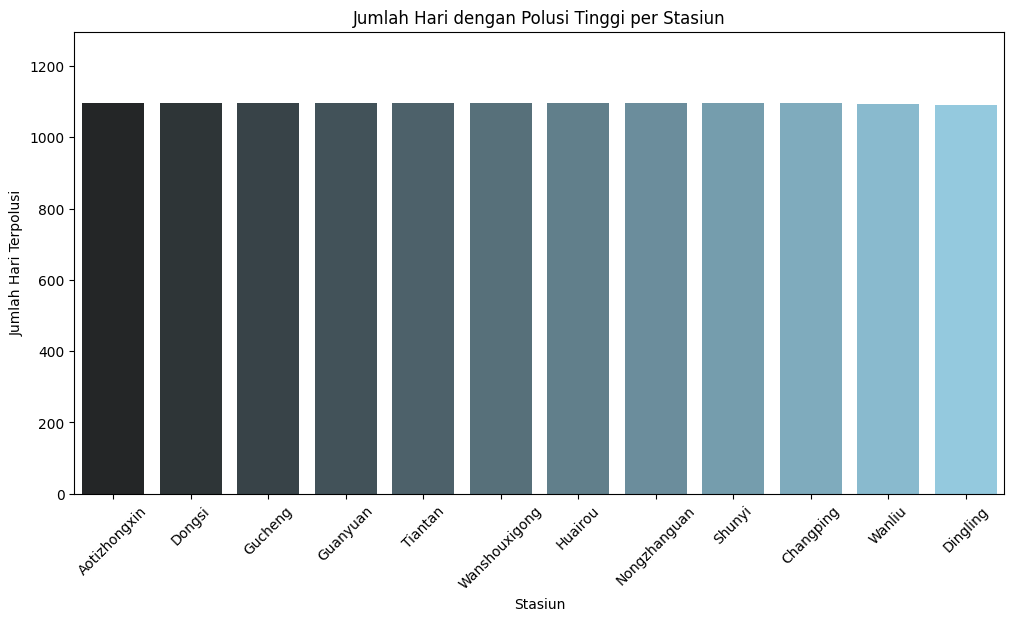

In [39]:
df_polluted_summary = df_polluted_summary.sort_values(by="jumlah_hari_terpolusi", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_polluted_summary,
    x="station",
    y="jumlah_hari_terpolusi",
    hue="station",
    palette="dark:skyblue"
)

plt.ylim(0, df_polluted_summary["jumlah_hari_terpolusi"].max() + 200)

plt.xlabel("Stasiun")
plt.ylabel("Jumlah Hari Terpolusi")
plt.title("Jumlah Hari dengan Polusi Tinggi per Stasiun")
plt.xticks(rotation=45)
plt.show()

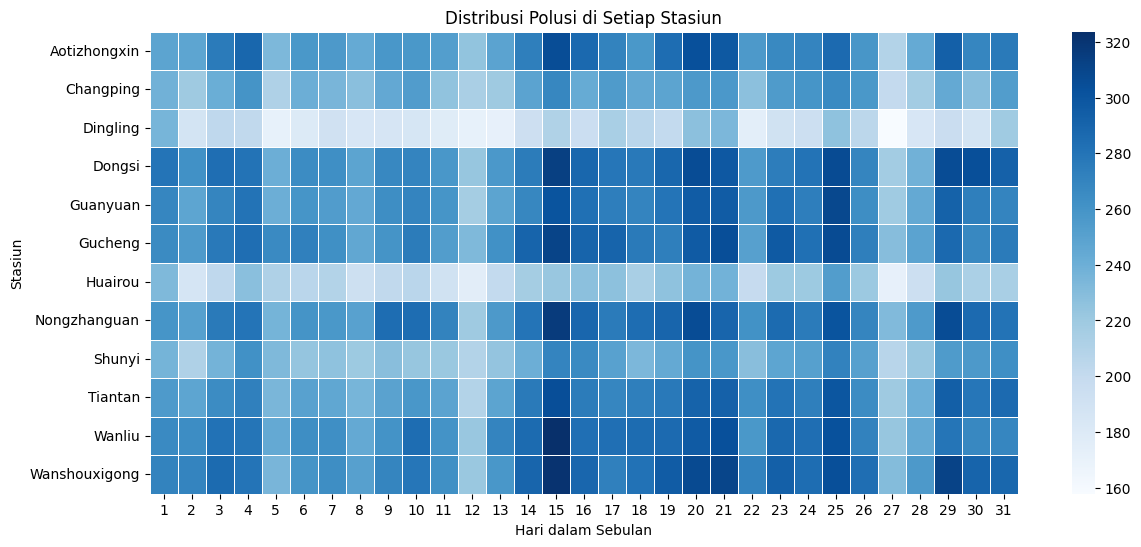

In [40]:
df_heatmap = df_polluted_stations.pivot_table(
    index="station",
    columns="day",
    values="polutan_average",
    aggfunc="mean"
)

plt.figure(figsize=(14, 6))
sns.heatmap(df_heatmap, cmap='Blues', linewidths=0.5)

plt.xlabel("Hari dalam Sebulan")
plt.ylabel("Stasiun")
plt.title("Distribusi Polusi di Setiap Stasiun")
plt.show()

> **`Insight`** : <br>Visualisasi "Jumlah Hari dengan Polusi Tinggi per Stasiun" menampilkan jumlah hari dengan tingkat polusi tinggi untuk setiap stasiun. Dari grafik ini, terlihat bahwa `hampir semua stasiun` memiliki jumlah hari dengan tingkat `polusi yang tinggi` secara konsisten, dengan perbedaan yang tidak terlalu signifikan di antara mereka. Stasiun seperti `Aotizhongxin, Dongsi, dan Gucheng` termasuk dalam kategori dengan `jumlah hari terbanyak` mengalami `polusi tinggi`, menandakan bahwa daerah ini memiliki `kualitas udara` yang `lebih buruk` dibandingkan stasiun lainnya.

>Sementara itu, visualisasi "Distribusi Polusi di Setiap Stasiun" memberikan gambaran distribusi polusi berdasarkan hari dalam sebulan untuk setiap stasiun. Dari heatmap ini, terlihat bahwa ada `pola ketidakstabilan polusi` yang terjadi di berbagai stasiun, dengan beberapa hari menunjukkan tingkat `polusi` yang `jauh lebih tinggi` dibandingkan hari lainnya. Stasiun seperti `Wanshouxigong, Gucheng, dan Nongzhanguan` menunjukkan `tingkat polusi` yang sering kali `lebih tinggi` dibandingkan stasiun lainnya dalam beberapa hari tertentu. Hal ini bisa mengindikasikan adanya faktor tertentu, seperti kondisi meteorologi atau aktivitas industri yang lebih intens di daerah tersebut.

### Question 2:

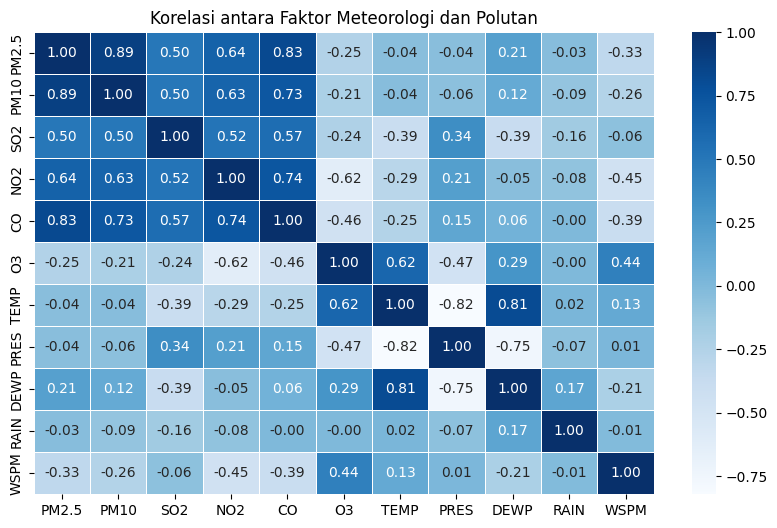

In [41]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_factors, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.title("Korelasi antara Faktor Meteorologi dan Polutan")
plt.show()

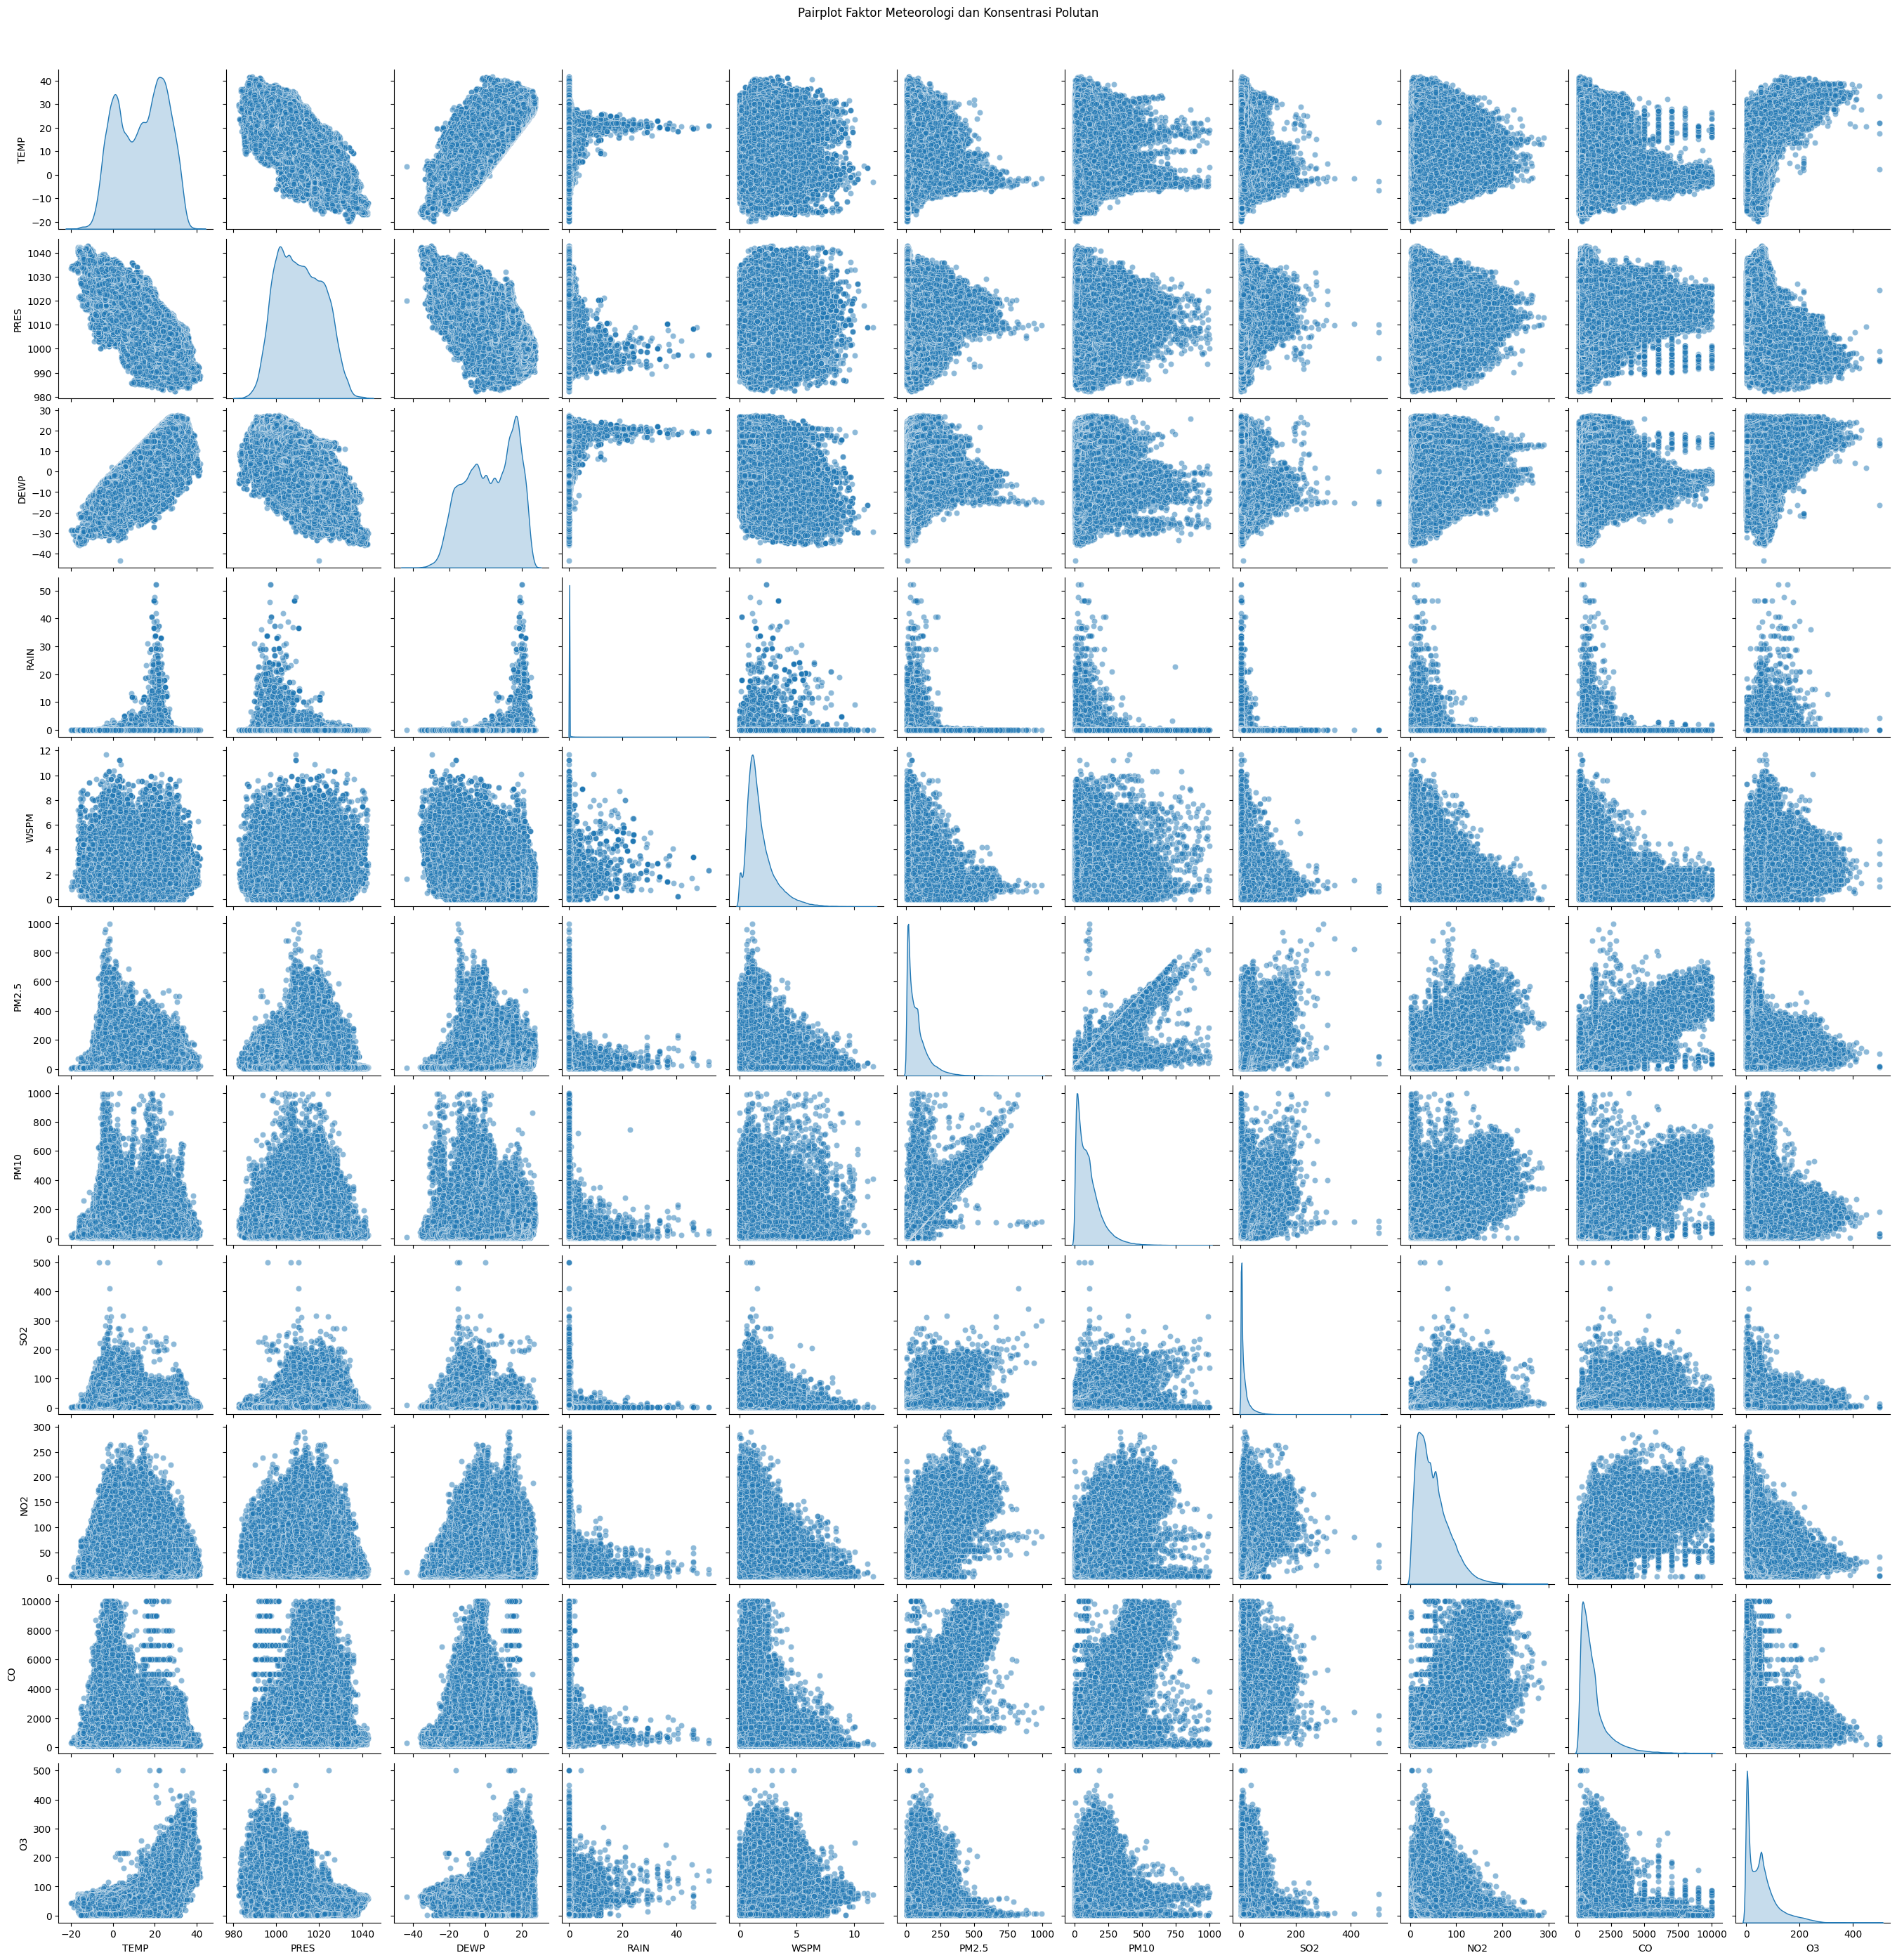

In [42]:
pairplot_vars = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

sns.pairplot(df_filtered[pairplot_vars], diag_kind="kde", plot_kws={'alpha':0.5})
plt.suptitle("Pairplot Faktor Meteorologi dan Konsentrasi Polutan", y=1.02)
plt.show()

> **`Insight`** : <br>

> 1.   Konsentrasi polutan vs Suhu udara (Temp):
- PM2.5, PM10, dan CO memiliki hubungan negatif lemah hingga sedang dengan suhu. Ini menunjukkan bahwa ketika suhu meningkat, konsentrasi polutan tersebut cenderung berkurang.
- O3 (ozon) memiliki hubungan moderat positif dengan suhu. Ozon meningkat pada suhu yang lebih tinggi.
- Dalam pairplot, terlihat sebaran O3 meningkat seiring kenaikan suhu, memperkuat hubungan positif yang ditemukan dalam heatmap.
- Sesama komponen meteorologi seperti tekanan udara (Pres) dan titik embun (Dewp) memiliki korelasi tinggi dengan suhu, yang menandakan bahwa suhu berperan besar dalam sistem cuaca secara keseluruhan.
> 2.   Konsentrasi Polutan vs Tekanan Udara (Pres):
- Tekanan udara memiliki hubungan negatif lemah dengan sebagian besar polutan, menunjukkan bahwa tekanan udara tidak memiliki implikasi langsung yang kuat terhadap polusi udara.
- Dari pairplot, terlihat bahwa polutan seperti PM2.5, PM10, dan CO memiliki sebaran yang cukup acak terhadap tekanan udara, yang menunjukkan bahwa tekanan udara tidak menjadi faktor utama dalam konsentrasi polutan.
> 3.   Konsentrasi Polutan vs Titik Embun (Dewp):
- Titik embun memiliki hubungan lemah dengan polutan, mirip dengan tekanan udara.
- Pairplot menunjukkan bahwa polutan memiliki distribusi yang cukup acak terhadap titik embun, sehingga tidak ada pola yang kuat dalam hubungan ini.
- Namun, titik embun memiliki hubungan yang sangat kuat dengan suhu dan tekanan udara, yang menegaskan bahwa faktor ini lebih berperan dalam sistem meteorologi daripada secara langsung mempengaruhi polutan.
> 4.   Konsentrasi Polutan vs Curah Hujan (Rain):
- Curah hujan memiliki hubungan lemah dengan semua faktor meteorologi dan polutan, sebagaimana terlihat dalam heatmap dan pairplot.
- Namun, dalam kenyataan, hujan berperan dalam mengurangi polutan dari atmosfer, sehingga bisa membantu menurunkan konsentrasi polutan dalam jangka waktu tertentu.
- Dari pairplot, tidak terlihat hubungan jelas antara curah hujan dan polutan, tetapi hujan tetap bisa dianggap sebagai faktor yang membantu membersihkan udara dalam kondisi tertentu.
> 4.   Konsentrasi Polutan vs Kecepatan Angin (WSPM):
- Hampir semua polutan memiliki hubungan negatif dengan kecepatan angin. Ini menunjukkan bahwa angin membantu menyebarkan polutan dan mengurangi konsentrasinya.
- Dari pairplot, terlihat pola sebaran bahwa ketika kecepatan angin tinggi, konsentrasi polutan seperti PM2.5 dan PM10 cenderung lebih rendah.
- Angin memainkan peran penting dalam penyebaran polutan, terutama di daerah perkotaan dengan aktivitas industri tinggi.

### Question 3:

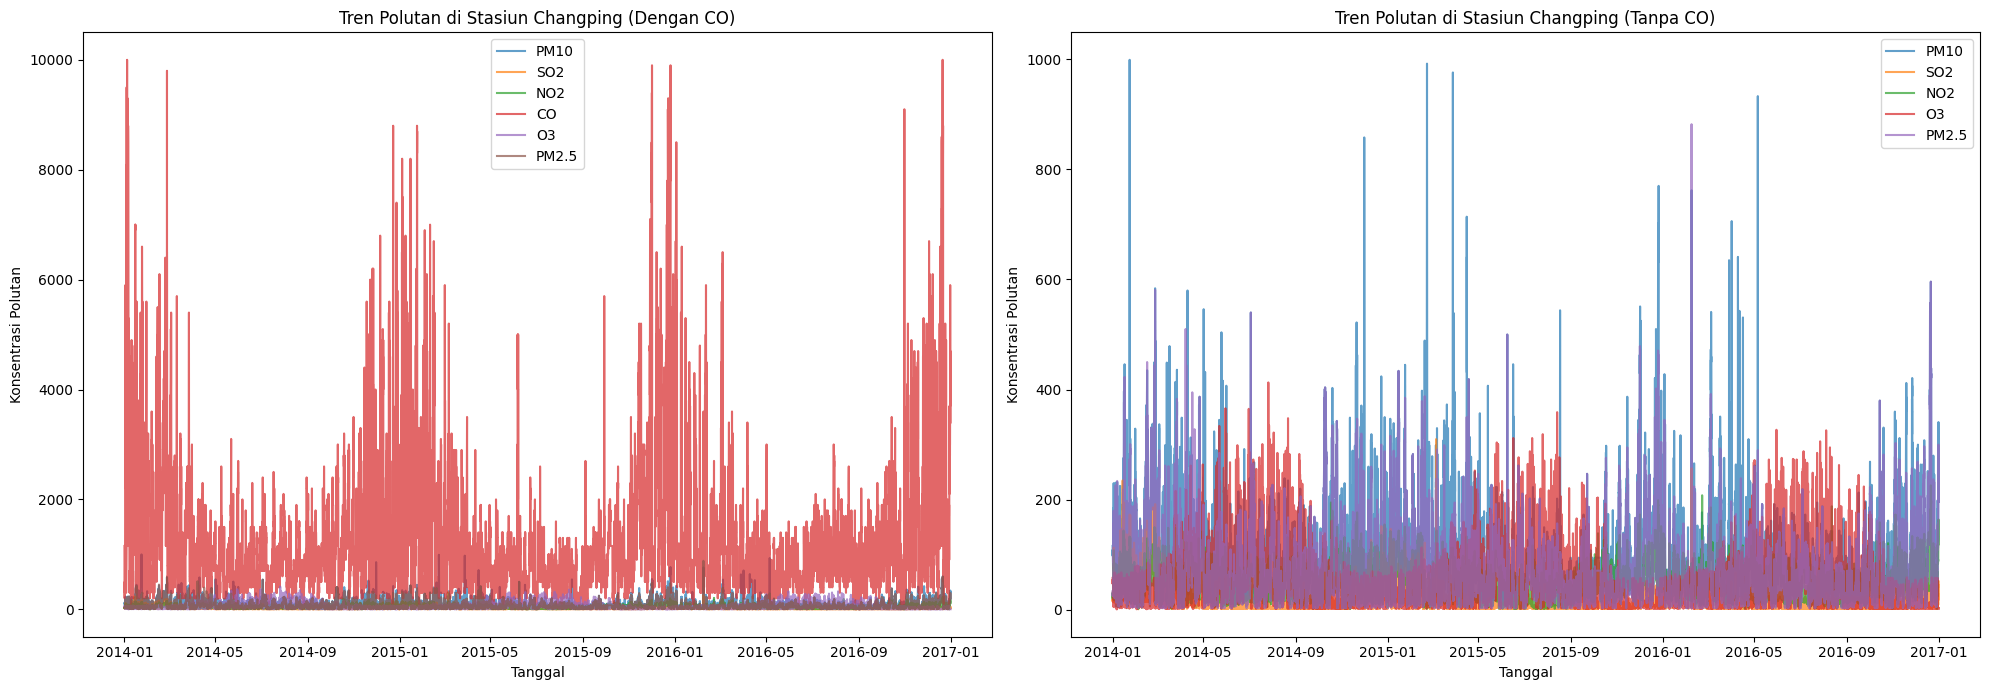

In [43]:
changping_data['date'] = pd.to_datetime(
    changping_data['year'].astype(str) + '-' +
    changping_data['month'].astype(str).str.zfill(2) + '-' +
    changping_data['day'].astype(str).str.zfill(2) + ' ' +
    changping_data['hour'].astype(str).str.zfill(2) + ':00'
)

changping_data.set_index('date', inplace=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

ax1.plot(changping_data['PM10'], label='PM10', alpha=0.7)
ax1.plot(changping_data['SO2'], label='SO2', alpha=0.7)
ax1.plot(changping_data['NO2'], label='NO2', alpha=0.7)
ax1.plot(changping_data['CO'], label='CO', alpha=0.7)
ax1.plot(changping_data['O3'], label='O3', alpha=0.7)
ax1.plot(changping_data['PM2.5'], label='PM2.5', alpha=0.7)
ax1.set_title('Tren Polutan di Stasiun Changping (Dengan CO)')
ax1.set_xlabel('Tanggal')
ax1.set_ylabel('Konsentrasi Polutan')
ax1.legend()


ax2.plot(changping_data['PM10'], label='PM10', alpha=0.7)
ax2.plot(changping_data['SO2'], label='SO2', alpha=0.7)
ax2.plot(changping_data['NO2'], label='NO2', alpha=0.7)
ax2.plot(changping_data['O3'], label='O3', alpha=0.7)
ax2.plot(changping_data['PM2.5'], label='PM2.5', alpha=0.7)
ax2.set_title('Tren Polutan di Stasiun Changping (Tanpa CO)')
ax2.set_xlabel('Tanggal')
ax2.set_ylabel('Konsentrasi Polutan')
ax2.legend()

plt.tight_layout()
plt.show()

> **`Insight`** : <br>Grafik tersebut menunjukkan tren polutan PM2.5, PM10, SO2, NO2, CO, dan O3 dari Januari 2014 hingga Januari 2017.
Pada grafik, CO memiliki konsentrasi polutan yang sangat tinggi, mencapai 10.000 µg/m³.
Namun, adanya outlier pada data CO dapat mengganggu interpretasi tren secara keseluruhan.
Jika CO dihapus dari analisis, terlihat bahwa PM2.5 dan PM10 menjadi polutan dominan.
Kedua polutan ini memiliki dampak signifikan terhadap kesehatan dan kualitas udara, serta sering dijadikan indikator utama polusi udara di daerah perkotaan.

### Question 4:

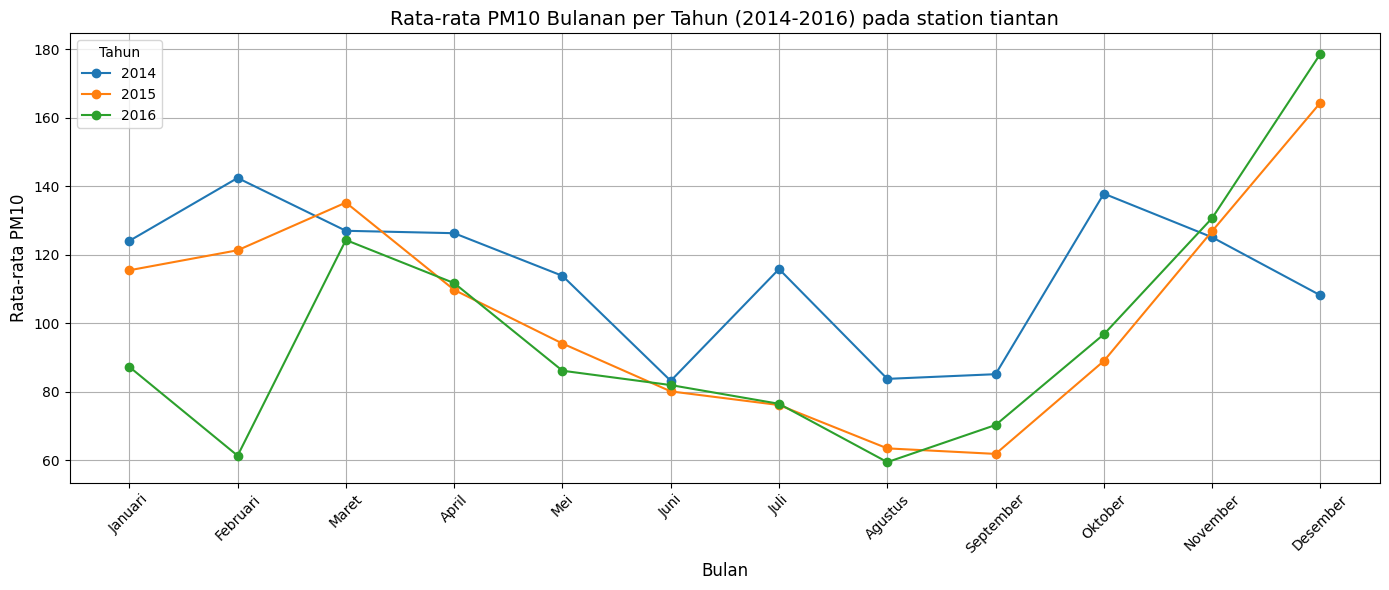

In [44]:
# Visualisasi rata-rata PM10 bulanan per tahun menggunakan seaborn lineplot
plt.figure(figsize=(14, 6))

for year in pm10_per_bulan.index:
    plt.plot(pm10_per_bulan.columns, pm10_per_bulan.loc[year], label=str(year), marker='o')

plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Rata-rata PM10', fontsize=12)
plt.title('Rata-rata PM10 Bulanan per Tahun (2014-2016) pada station tiantan', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Tahun')

# Menampilkan grafik
plt.tight_layout()
plt.show()

> **`Insight`** : <br>
Konsentrasi PM10 cenderung lebih tinggi pada musim dingin (November hingga Januari) daripada musim panas (Juni hingga Agustus) berdasarkan analisis distribusi rata-rata bulanan PM10 di Stasiun Tiantan dari 2014 hingga 2016. Jumlah tertinggi konsentrasi PM10 biasanya terjadi pada bulan Januari, disebabkan oleh peningkatan penggunaan bahan bakar fosil, kondisi atmosfer yang stabil, dan fenomena inversi suhu. Di sisi lain, selama bulan musim panas, hujan dan peningkatan kecepatan angin menurunkan konsentrasi PM10 secara signifikan. Pola ini menekankan bahwa pengendalian polusi selama musim dingin sangat penting untuk meningkatkan kualitas udara.

### Question 5:

<ipython-input-45-488bad4b4f10>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Pagi (06:00 - 10:00)', 'Sore (15:00 - 19:00)'], y=[avg_o3_pagi, avg_o3_sore], palette='Set2')


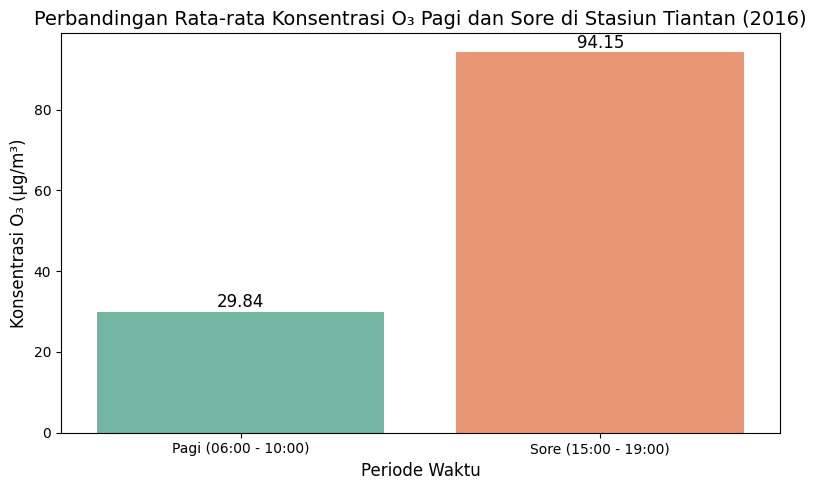

In [45]:
# Membuat bar chart perbandingan rata-rata O₃ antara pagi dan sore
plt.figure(figsize=(8, 5))
sns.barplot(x=['Pagi (06:00 - 10:00)', 'Sore (15:00 - 19:00)'], y=[avg_o3_pagi, avg_o3_sore], palette='Set2')

plt.title('Perbandingan Rata-rata Konsentrasi O₃ Pagi dan Sore di Stasiun Tiantan (2016)', fontsize=14)
plt.xlabel('Periode Waktu', fontsize=12)
plt.ylabel('Konsentrasi O₃ (µg/m³)', fontsize=12)

# Menambahkan nilai di atas setiap bar
for i, value in enumerate([avg_o3_pagi, avg_o3_sore]):
    plt.text(i, value + 0.2, f'{value:.2f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

> **`Insight`** : <br>
Berdasarkan analisis data ozon di Stasiun Tiantan sepanjang tahun 2016, ada perbedaan yang signifikan dalam konsentrasi rata-rata ozon antara pagi dan sore hari. Pada waktu pagi, antara pukul 06:00 dan 10:00, konsentrasi ozon lebih rendah, mungkin karena proses fotokimia belum mencapai puncaknya karena intensitas sinar matahari yang masih rendah. Pada waktu sore, konsentrasi ozon meningkat secara signifikan dari pukul 15:00 hingga 19:00. Menurut tren ini, ozon adalah polutan sekunder yang sangat bergantung pada radiasi matahari dan suhu lingkungan.

### Question 6:

Setelah dilakukan berbagai riset mengenai rush hour di China, menunjukkan bahwa China memiliki rush hour (jam sibuk) sekitar jam 7-9 pagi dan 5-7 sore, dimana pada saat itu terdapat banyaknya mobilitas kendaraan di jalan yang menyebabkan polusi. Sedangkan untuk off-peak hour (jam tidak sibuk) selain di jam 7-9 pagi dan selain di jam 5-7 sore, dimana orang-orang melakukan kegiatannya masing-masing.

In [46]:
pollutants = ['PM2.5', 'PM10', 'SO2']
rush_values = rush_avg.values
off_peak_values = off_peak_avg.values

Terdapat analisis kualitas udara dengan membandingkan konsentrasi tiga polutan utama (PM2.5, PM10, dan SO2) selama jam sibuk (rush hour) dan di luar jam sibuk (off-peak). Nilai rata-rata polutan untuk kedua kondisi disimpan dalam rush_values dan off_peak_values, yang dapat digunakan untuk analisis lebih lanjut atau visualisasi pola perubahan polutan.

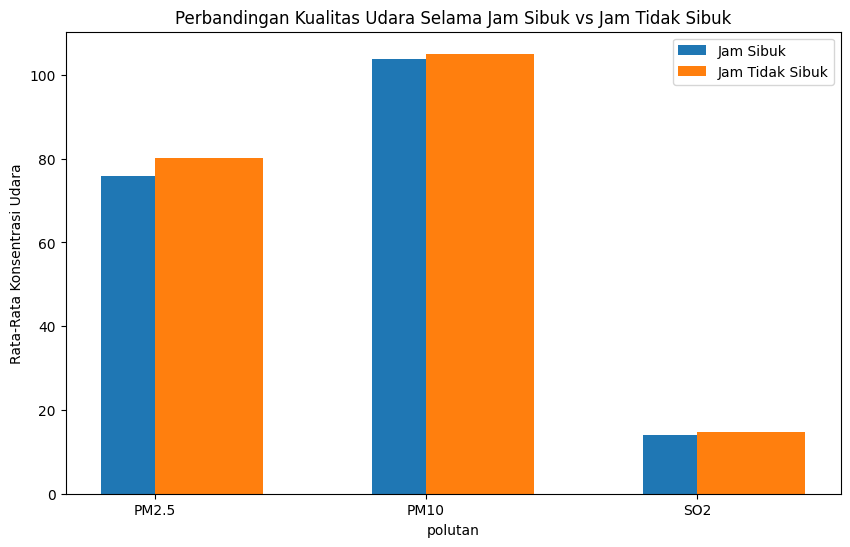

In [47]:
x = range(len(pollutants))
plt.figure(figsize=(10, 6))
plt.bar(x, rush_values, width=0.4, label='Jam Sibuk', align='center')
plt.bar(x, off_peak_values, width=0.4, label='Jam Tidak Sibuk', align='edge')
plt.xlabel('polutan')
plt.ylabel('Rata-Rata Konsentrasi Udara')
plt.title('Perbandingan Kualitas Udara Selama Jam Sibuk vs Jam Tidak Sibuk')
plt.xticks(ticks=x, labels=pollutants)
plt.legend()
plt.show()

> **`Insight`** : <br>
* PM2.5: `Konsentrasi rata-rata PM2.5 saat jam tidak sibuk lebih tinggi dibandingkan saat jam sibuk`. Ini menunjukkan bahwa polutan PM2.5 tidak hanya dipengaruhi oleh aktivitas kendaraan pada jam sibuk tetapi mungkin juga berasal dari sumber lain yang beroperasi secara konstan sepanjang hari, seperti industri atau pembangkit listrik yang menghasilkan polusi sepanjang waktu
* PM10: `Konsentrasi rata-rata PM10 pada jam sibuk lebih sedikit namun tidak terlalu jauh berbeda dengan jam tidak sibuk`. Hal ini mengindikasikan bahwa faktor-faktor lain di luar jam sibuk, seperti aktivitas konstruksi atau angin, mungkin memiliki kontribusi besar terhadap polusi PM10 di daerah tersebut.
* SO2: `Konsentrasi rata-rata SO2 sedikit lebih tinggi selama jam tidak sibuk`, tetapi perbedaan ini tidak signifikan. Ini bisa menunjukkan bahwa aktivitas lalu lintas tidak terlalu memengaruhi level SO2, atau sumber SO2 di wilayah ini mungkin berasal dari sumber tetap yang konsisten seperti industri.


>Berdasarkan analisis diatas, dapat diketahui bahwa besar perbandingan polutan saat jam sibuk lebih sedikit dibanding dengan jam tidak sibuk. Secara logis artinya seluruh dataset tidak semuanya diambil berdasarkan polusi mobilitas/kendaraan saja, melainkan terdapat faktor-faktor lain yang menyebabkan peningkatan polusi, seperti industri, dan lain-lain.

### Question 7:

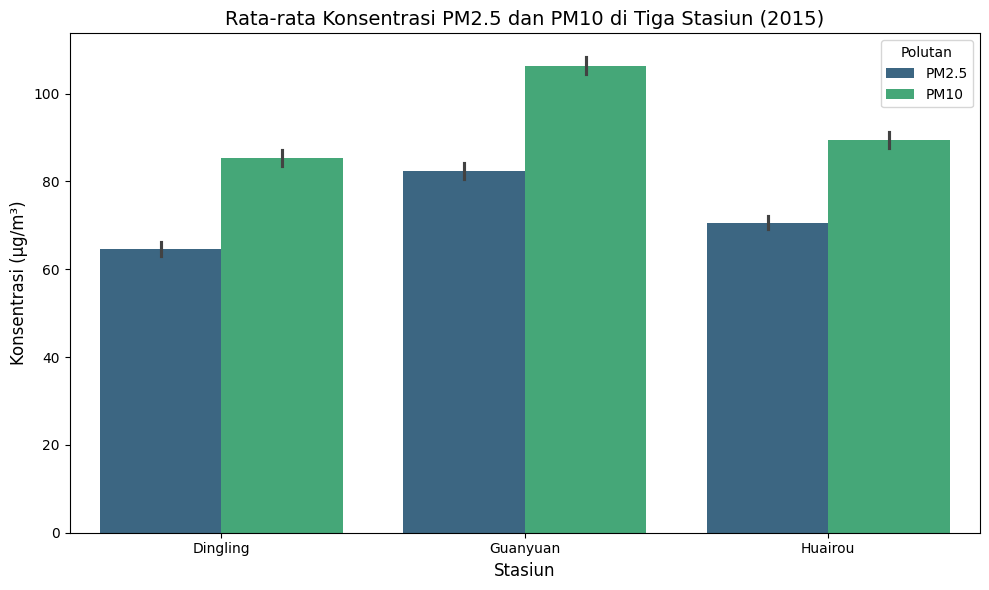

In [48]:
# Membuat bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=filter_data.melt(id_vars=['station'], value_vars=['PM2.5', 'PM10'], var_name='Polutan', value_name='Konsentrasi'),
    x='station', y='Konsentrasi', hue='Polutan', ci=None, palette=['blue', 'green']
)
plt.xlabel('Stasiun')
plt.ylabel('Konsentrasi (µg/m³)')
plt.title('Rata-rata Konsentrasi PM2.5 dan PM10 di 3 Stasiun pada Tahun 2015')
plt.show()

> **`Insight`** : <br>
1. Konsentrasi PM2.5 dan PM10 Berbeda di Setiap Stasiun
- Stasiun Guanyuan memiliki konsentrasi tertinggi untuk PM10 dibandingkan stasiun lainnya.
- Konsentrasi PM2.5 lebih rendah dibandingkan PM10 di semua stasiun.
2. Polusi Lebih Tinggi di Stasiun Guanyuan
- Stasiun Guanyuan menunjukkan tingkat polutan PM2.5 dan PM10 yang lebih tinggi dibandingkan Dingling dan Huairou.
- Hal ini mengindikasikan bahwa Guanyuan mungkin merupakan area yang lebih rentan terhadap polusi udara.
3. Konsentrasi Relatif Seimbang di Huairou
- Stasiun Huairou menunjukkan konsentrasi PM10 yang cukup tinggi, tetapi masih lebih rendah dibandingkan Guanyuan. Konsentrasi PM2.5 lebih kecil, yang mungkin menunjukkan kondisi udara yang relatif lebih bersih.


## Conclusion

- Conclusion Question 1 : </br>
Polusi udara tinggi terjadi secara konsisten di hampir semua stasiun pemantauan, dengan Aotizhongxin, Dongsi, dan Gucheng mengalami jumlah hari dengan tingkat polusi tertinggi. Distribusi polusi juga bervariasi berdasarkan hari dalam sebulan, di mana Wanshouxigong, Gucheng, dan Nongzhanguan sering mengalami lonjakan polusi pada hari-hari tertentu. Pola ketidakstabilan ini kemungkinan dipengaruhi oleh faktor meteorologi seperti suhu, tekanan udara, curah hujan, serta aktivitas industri yang menyebabkan beberapa hari memiliki tingkat polusi yang jauh lebih tinggi dibandingkan hari lainnya.
>
- Conclusion Question 2 : </br>
Berdasarkan analisis hubungan antara faktor meteorologi dan konsentrasi polutan, ditemukan bahwa suhu udara memiliki hubungan negatif dengan PM2.5, PM10, dan CO, tetapi memiliki hubungan positif dengan O3 akibat reaksi fotokimia. Tekanan udara dan titik embun tidak memiliki korelasi kuat terhadap polutan, namun keduanya berkaitan erat dengan suhu, menunjukkan peran penting dalam dinamika cuaca. Curah hujan tidak menunjukkan hubungan yang signifikan dengan polutan, meskipun secara alami dapat membantu membersihkan udara. Sementara itu, kecepatan angin berperan dalam menyebarkan polutan, dengan korelasi negatif terhadap hampir semua jenis polutan, menandakan bahwa angin efektif dalam menurunkan konsentrasi polusi udara.
>
- Conclusion Question 3 : </br>
Pada saat bergantian tahun 2014-2016 CO(Karbon Monoksida) menjadi satu satunya penyumbang polutan terbanyak di stasiun Changping.
>
- Conclusion Question 4 : </br>
Selama tahun 2014–2016, distribusi rata-rata PM10 di Stasiun Tiantan menunjukkan pola yang jelas. Konsentrasi tertinggi terlihat pada musim dingin (November hingga Januari) dan terendah pada musim panas (Juni hingga Agustus). Fenomena inversi suhu dan peningkatan aktivitas domestik berbahan bakar fosil memiliki kecenderungan untuk memperburuk kualitas udara selama musim dingin. Strategi pengendalian emisi musim dingin dapat membantu mengurangi polusi di wilayah tersebut.
>
- Conclusion Question 5 : </br>
Pola temporal yang signifikan terlihat dalam perbedaan konsentrasi O3 rata-rata Stasiun Tiantan pada tahun 2016. Seiring dengan aktivitas fotokimia yang dipicu oleh intensitas sinar matahari, konsentrasi ozon lebih rendah pada pagi hari (06:00–10:00) dan meningkat pada sore hari (15:00–19:00). Kondisi ini menunjukkan bahwa ozon yang ada di daerah tersebut adalah polutan sekunder yang sangat bergantung pada radiasi matahari. Membatasi aktivitas di luar ruangan pada jam puncak konsentrasi oksigen di sore hari adalah langkah mitigasi yang harus mempertimbangkan puncak ini.
>
- Conclusion Question 6 : </br>
Berdasarkan analisis perbandingan kualitas udara antara rush hour (jam sibuk) dan off-peak hours (jam tidak sibuk), terlihat bahwa konsentrasi polutan tertentu, seperti PM2.5, PM10, dan SO2 tidak hanya bergantung pada aktivitas mobilitas atau kendaraan saat jam sibuk, tetapi juga dipengaruhi oleh faktor lain yang terjadi secara konstan di luar jam sibuk, seperti aktivitas industri dan konstruksi.
>
- Conclusion Question 7 : </br>
1. PM10 lebih dominan di semua stasiun dibandingkan PM2.5, yang berarti partikel polutan berukuran lebih besar lebih banyak ditemukan di udara pada tahun 2015.
2. Stasiun Guanyuan adalah titik polusi tertinggi, yang bisa jadi karena aktivitas manusia yang lebih intensif seperti industri atau lalu lintas yang padat.
3. Perlu adanya pengawasan dan tindakan di stasiun dengan konsentrasi tinggi untuk mengurangi dampak negatif polusi terhadap kesehatan masyarakat.